In [4]:
import sys #you need this to add path to utils folder
sys.path.append('../utils') #now you can import from utils folder
from configs import config_general
from dataloaders import dataloader_emg_joints
from data_utils import wavelet_filter_signal_single_channel
#test

In [5]:
#load csv file to generate example data, this is just an example, in reality we would already have these as wav files
import pandas as pd
import numpy as np

emgdata_df=pd.read_csv('../../datacollection/EMG-data.csv')

In [6]:
#drop last two columns as we dont need class and labels
emgdata_df=emgdata_df.drop(emgdata_df.columns[-1:], axis=1)
emgdata_df=emgdata_df[:100000]
emgdata_df.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0


array([<Axes: xlabel='timesteps'>, <Axes: xlabel='timesteps'>,
       <Axes: xlabel='timesteps'>, <Axes: xlabel='timesteps'>,
       <Axes: xlabel='timesteps'>, <Axes: xlabel='timesteps'>,
       <Axes: xlabel='timesteps'>, <Axes: xlabel='timesteps'>,
       <Axes: xlabel='timesteps'>, <Axes: xlabel='timesteps'>],
      dtype=object)

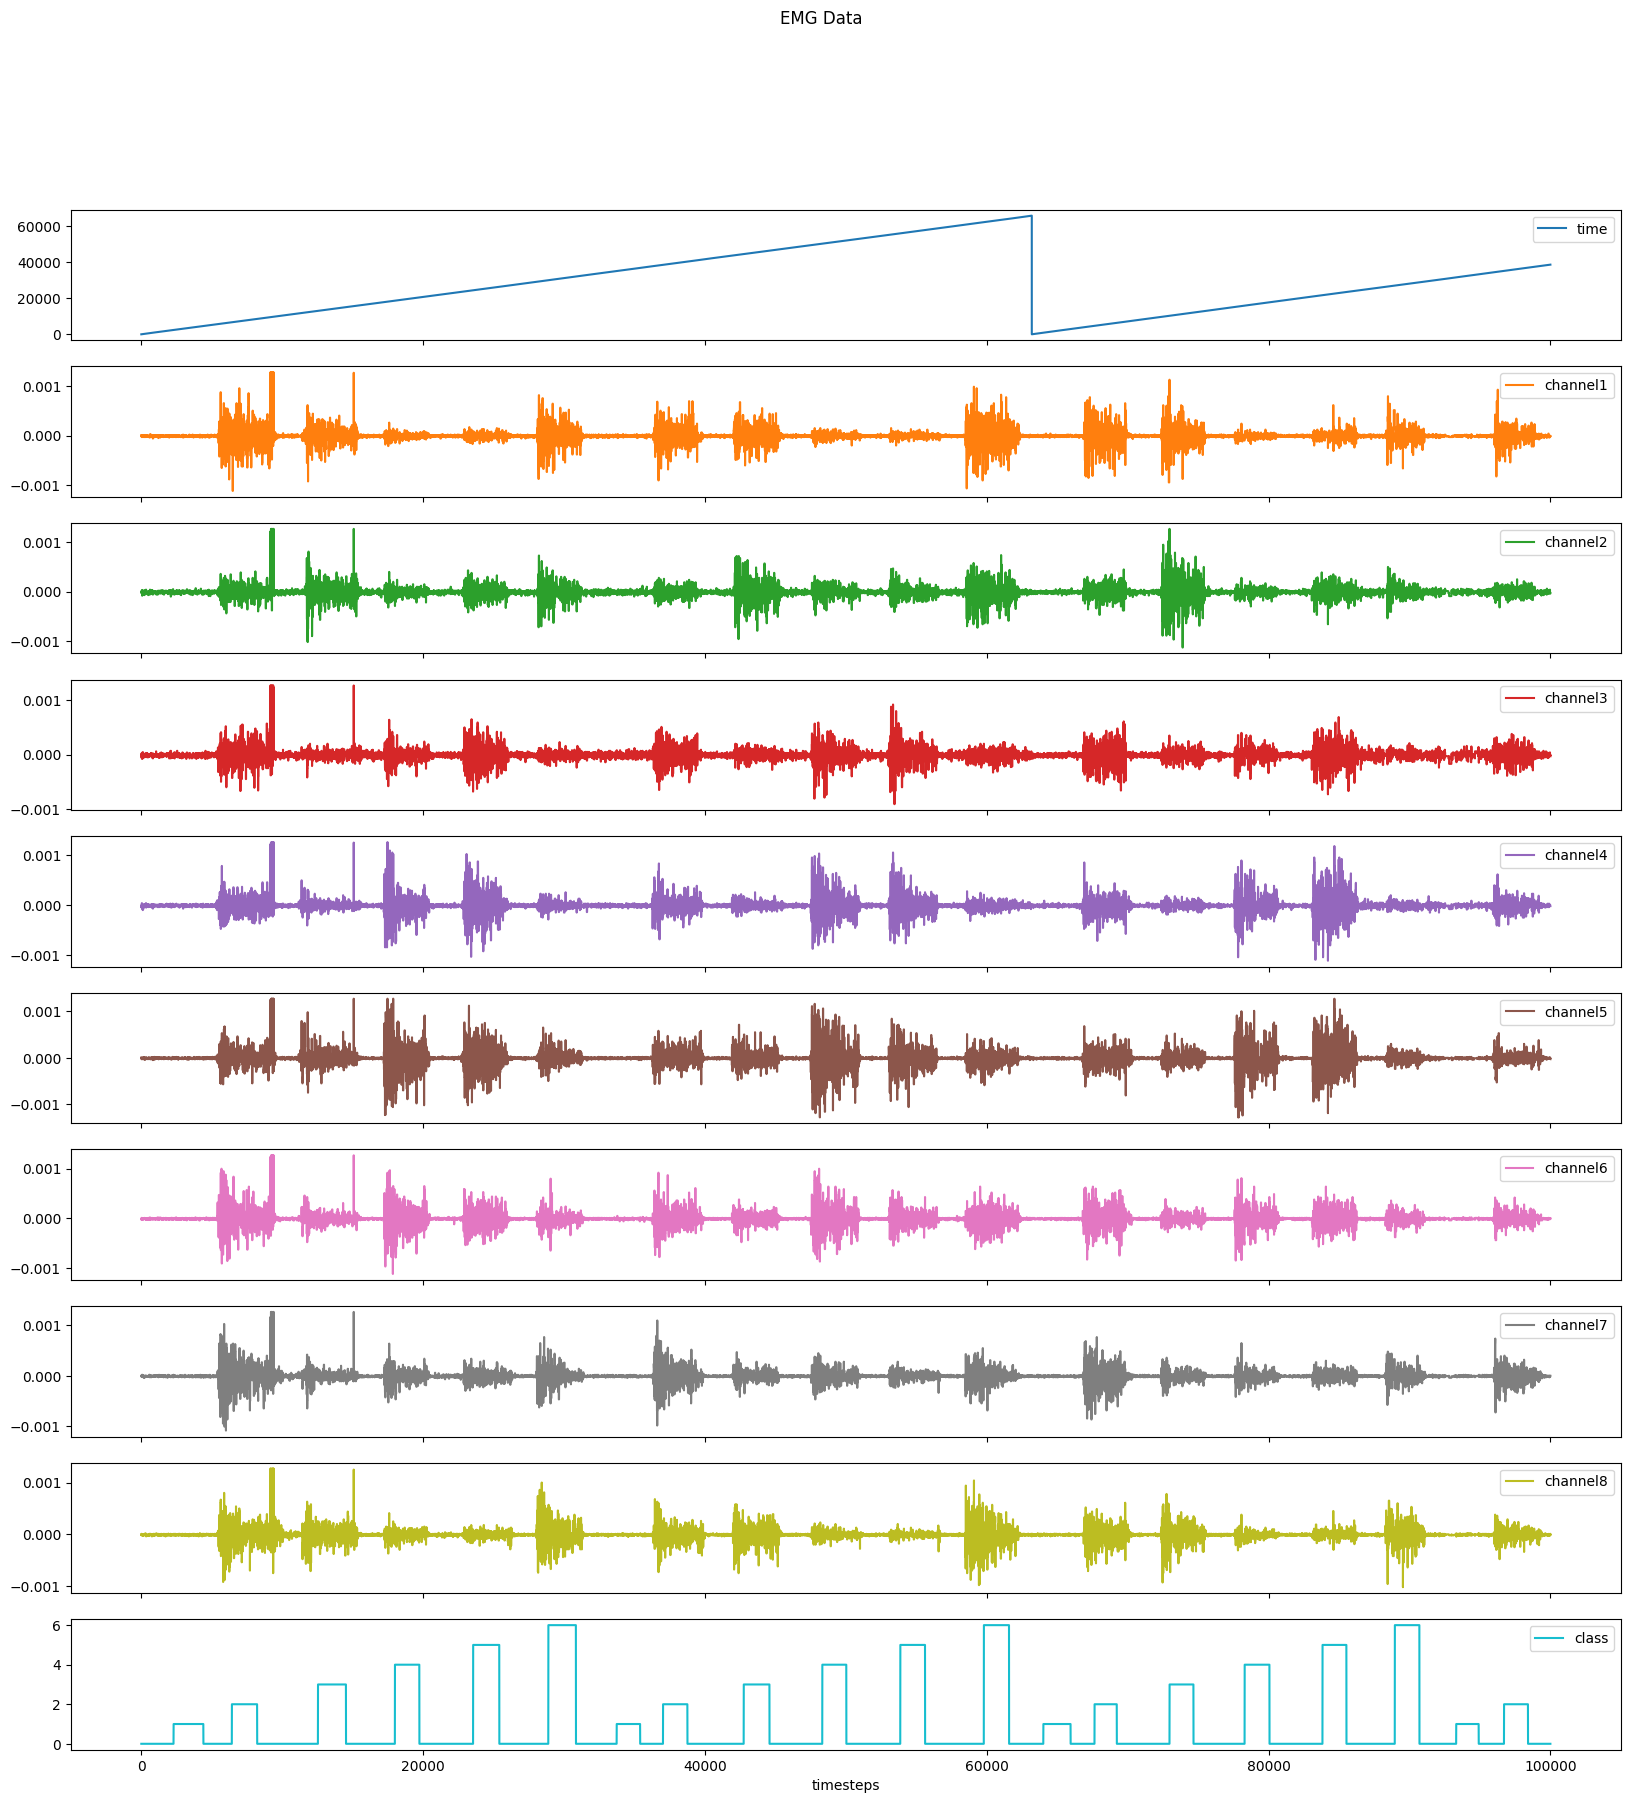

In [7]:
#plot first channel
emgdata_df.plot(subplots=True, figsize=(20,20), xlabel='timesteps', title='EMG Data')

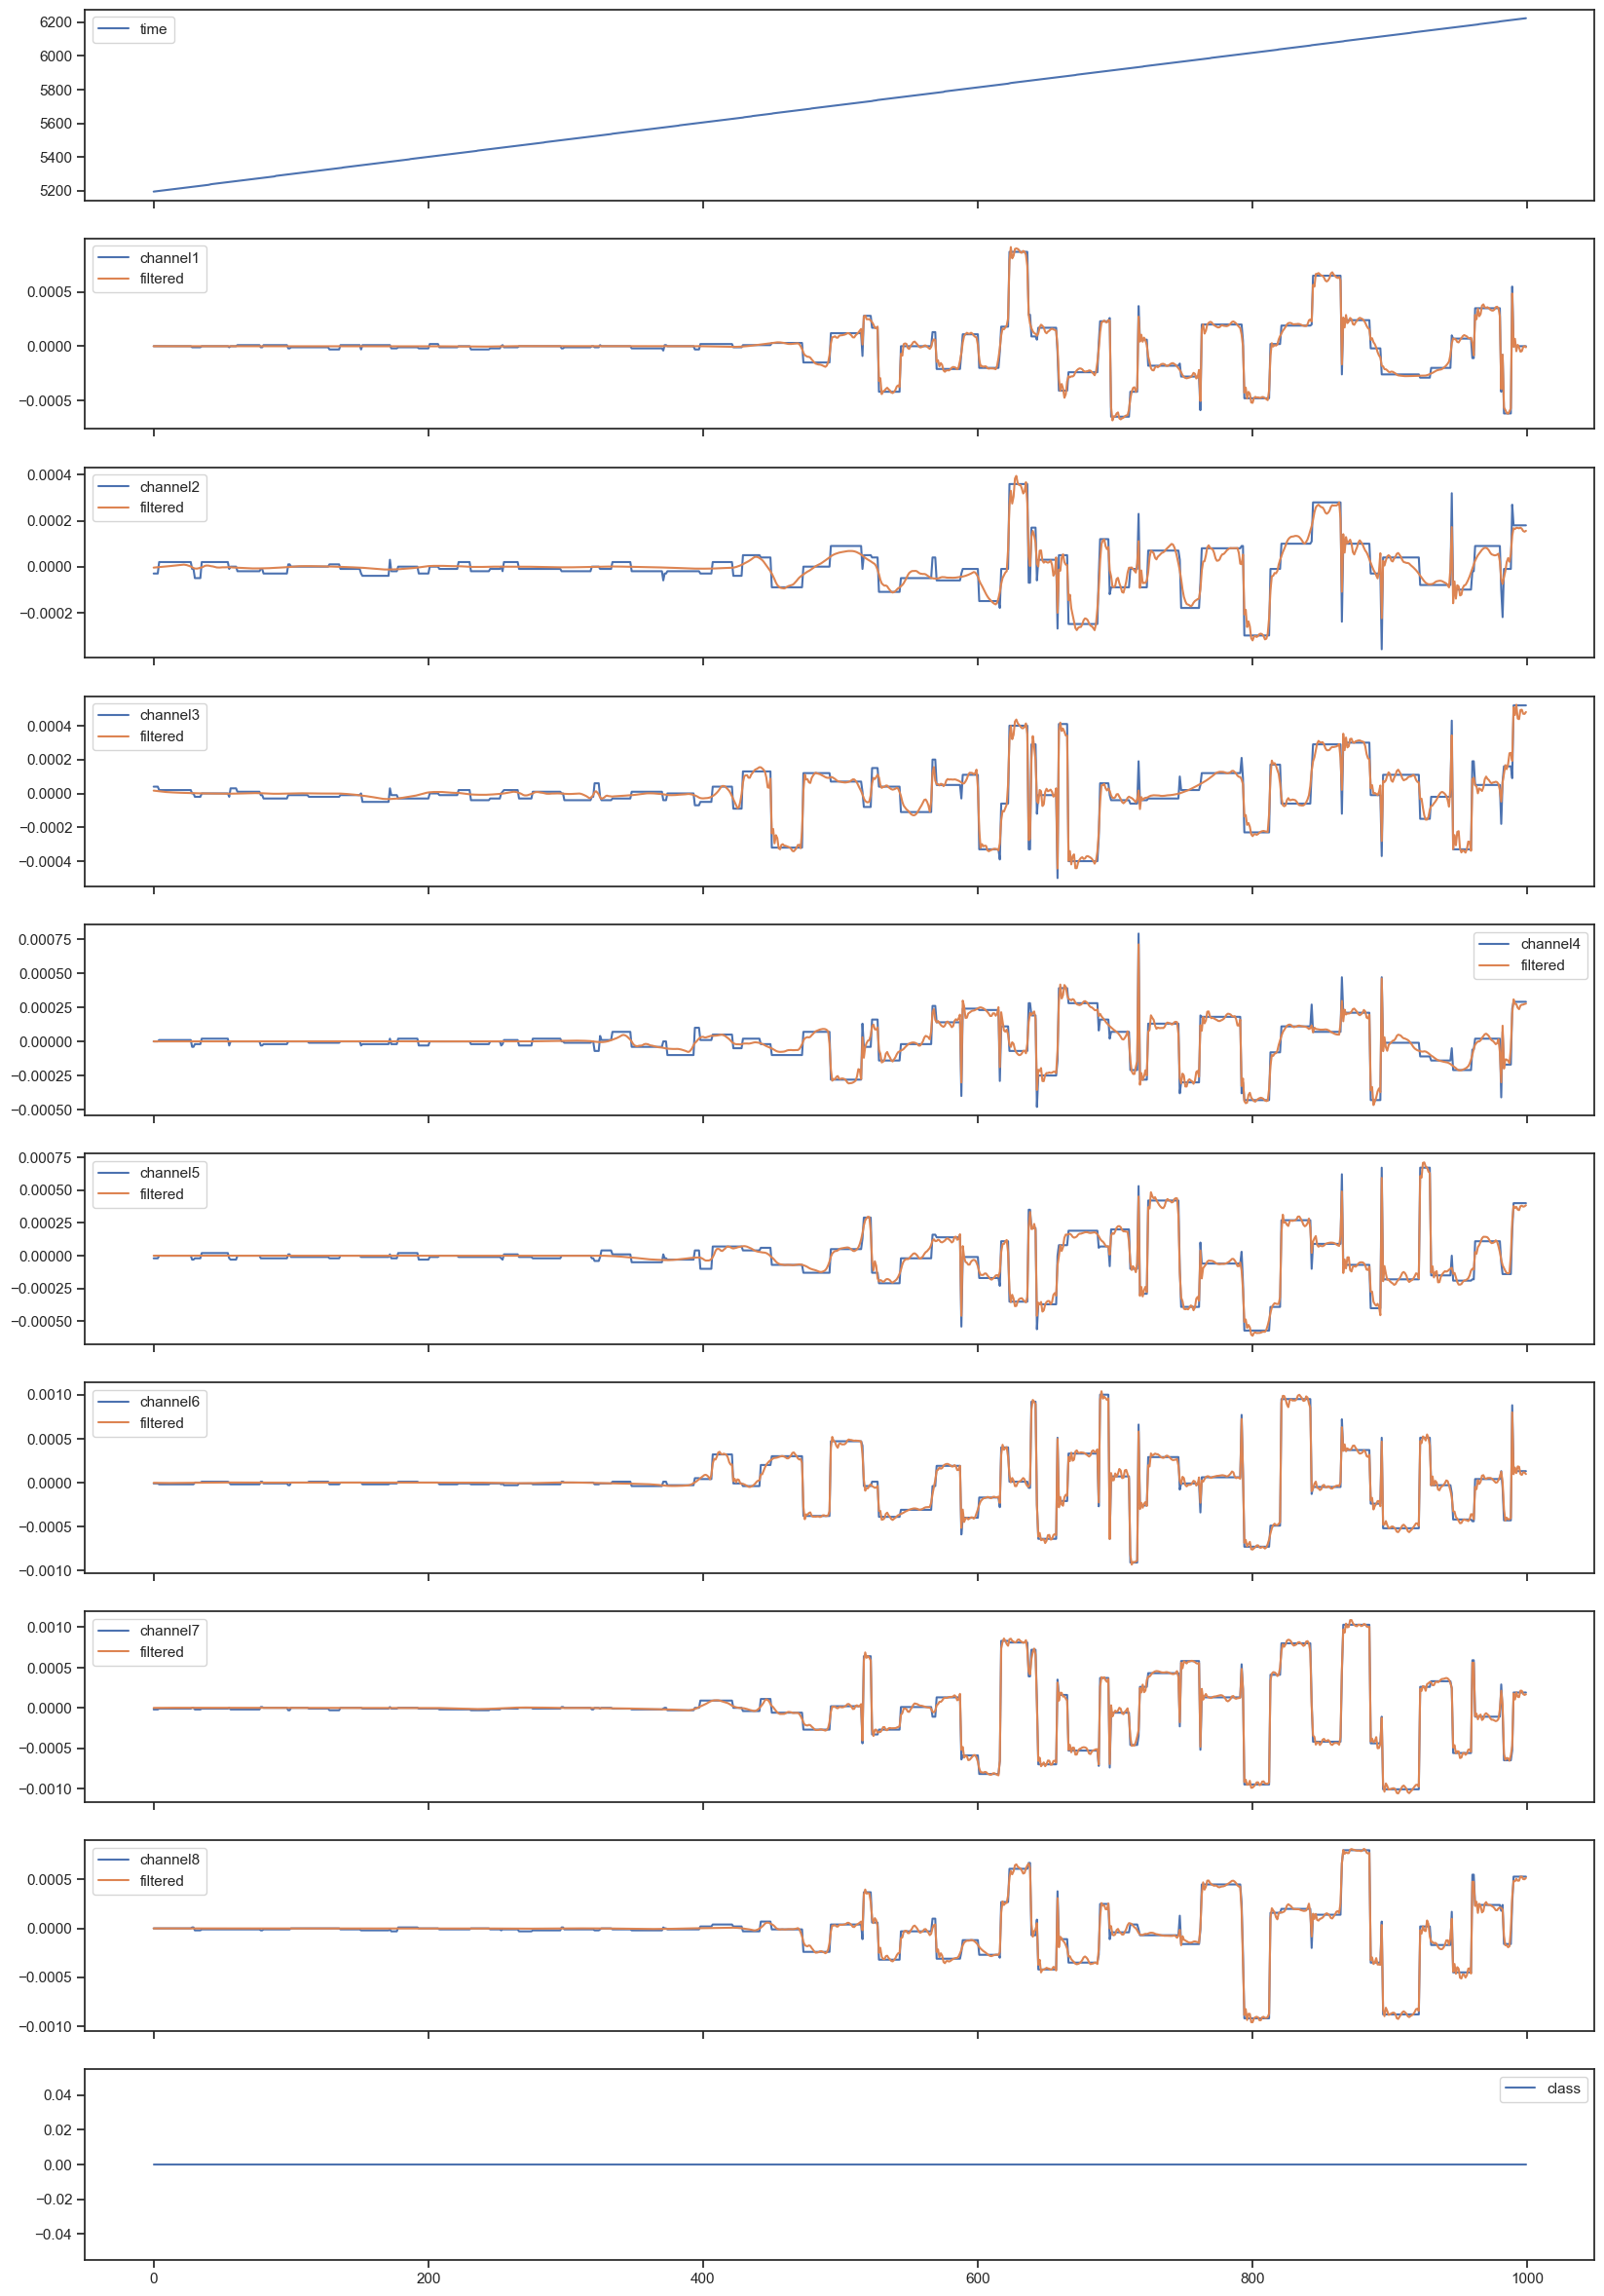

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
#plot all data
fig, axs = plt.subplots(len(emgdata_df.columns), 1, figsize=(20, 30), sharex=True)
num_samples = 1000
start = 5000
end = start + num_samples
for i in range(len(emgdata_df.columns)):
    axs[i].plot(np.array(emgdata_df)[start:end,i], label=emgdata_df.columns[i])
    if i != 0 and i != len(emgdata_df.columns)-1:
        axs[i].plot(wavelet_filter_signal_single_channel(np.array(emgdata_df)[start:end,i], .0001, 'db4', 'garrote', 5), label='filtered')
    axs[i].legend()


In [ ]:
#save each one as a scipy wav file
from scipy.io import wavfile
wavfile.write('fake_emg_data.wav', sample_rate, fake_emg_data)
wavfile.write('fake_joint_data.wav', sample_rate, fake_joint_data)
